# SyriaTel Company Customer Churn Prediction

* Student name: Myles Mulusa
* Student pace: Part Time
* Scheduled project review date/time: 22nd May, 2024
* Instructor name: William Okomba/Noah Kandie
* Blog post URL:

# Table of Contents
* Overview
* Business Problem
* Objectives
* Data Understanding & Cleaning
* Exploratory Data Analysis (EDA)
* Data Pre-processing
* Modeling
* Model Evaluation
* Conclusion

## Overview
The telecommunications industry is currently facing intense competition, with a significant challenge being customer churn. Customer churn refers to the process where customers stop using a company’s services, either due to dissatisfaction or the availability of better alternatives from competitors at lower prices. This can lead to substantial revenue and profit losses. Furthermore, retaining customers has become increasingly difficult.

To ensure customer satisfaction and provide top-notch services, telecom companies are continuously developing and introducing innovative applications and technologies. Identifying customers who are likely to leave the company in the near future is crucial, as losing them would result in significant financial losses. Accurately predicting customer churn can enhance retention rates, boost market share, and improve overall business performance. This project focuses on the important task of predicting customer churn.

## Business Problem
In the highly competitive business landscape, companies face saturation challenges. SyriaTel, a telecommunications firm, seeks to implement effective strategies to retain its current customer base, aiming to maintain its market value. The expense of attracting new customers far exceeds that of keeping existing ones. Additionally, reducing customer churn is vital for minimizing financial losses. Thus, identifying and adopting customer retention measures is critical for SyriaTel's ongoing success.

## Objectives
* Conduct exploratory data analysis on the dataset.
* Apply various classification algorithms to identify the most effective model for predicting customer churn.
* Select the optimal model based on performance.
* Use the chosen model to make churn predictions.
* Evaluate the accuracy of the predictions.
* Give recommendations on customer retention.

## Data Understanding & Cleaning
This data was obtained from kaggle , https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset.

We began by individually examining each predictor variable, focusing on their characteristics and distributions. During the data preparation phase, we meticulously cleaned the data as documented step-by-step in the notebook. We conducted univariate analysis to understand the distribution of each individual variable, followed by bivariate analysis to compare these variables against our target variable, churn. This helped us understand how the target variable is distributed across the predictor variables.

We also examined the relationships between variables and removed those that were highly correlated to prevent multicollinearity during modeling. Categorical variables were converted to numerical format for modeling purposes. The data was then split into training and testing sets, allowing us to train the model on the training set and evaluate it using the testing set. Various classification algorithms were applied to the data, and since many of these algorithms require data scaling, we standardized the predictor variables in both the training and testing sets.

### Steps for data cleaning
* Check data types
* Check for null values
* Check for duplicates
* Check for placeholder values/nonsensical values
* Check for imbalance of churn True vs False
* Check for outliers

In [311]:
# Import Libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [248]:
# Loading dataset
df = pd.read_csv('SyriaTelCustomerChurn.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [249]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

This dataset has 21 columns; 4 categorical, 16 numerical and 1 of type bool which is the target column. 

In [250]:
#Identify the number of columns and rows
df.shape

(3333, 21)

In [251]:
#Identify the names of each column
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [252]:
# Identify datatypes
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [253]:
# Check for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [254]:
# Check for duplicates
df.duplicated().sum()

0

In [255]:
def check_value_counts(data):
  for column in data.columns:
    print(f'value counts for {column}')
    print(data[column].value_counts())
    print('------------------------------------------','\n')

check_value_counts(df)

value counts for state
WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
------------------------------------------ 

value counts for account length
105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64
------------------------------------------ 

value counts for area code
415    1655
510     840
408     838
Name: area code, dtype: int64
------------------------------------------ 

value counts for phone 

In [256]:
# Check for placeholder values
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('\n-----------------------------------------------\n')

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

-----------------------------------------------

account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186

In [257]:
len(df['state'].unique())

51

In [258]:
# Check out spread of data
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [259]:
# Convert 'area code' to object
df["area code"] = df["area code"].astype(object)

# Drop the 'phone number' column
df = df.drop("phone number", axis=1)

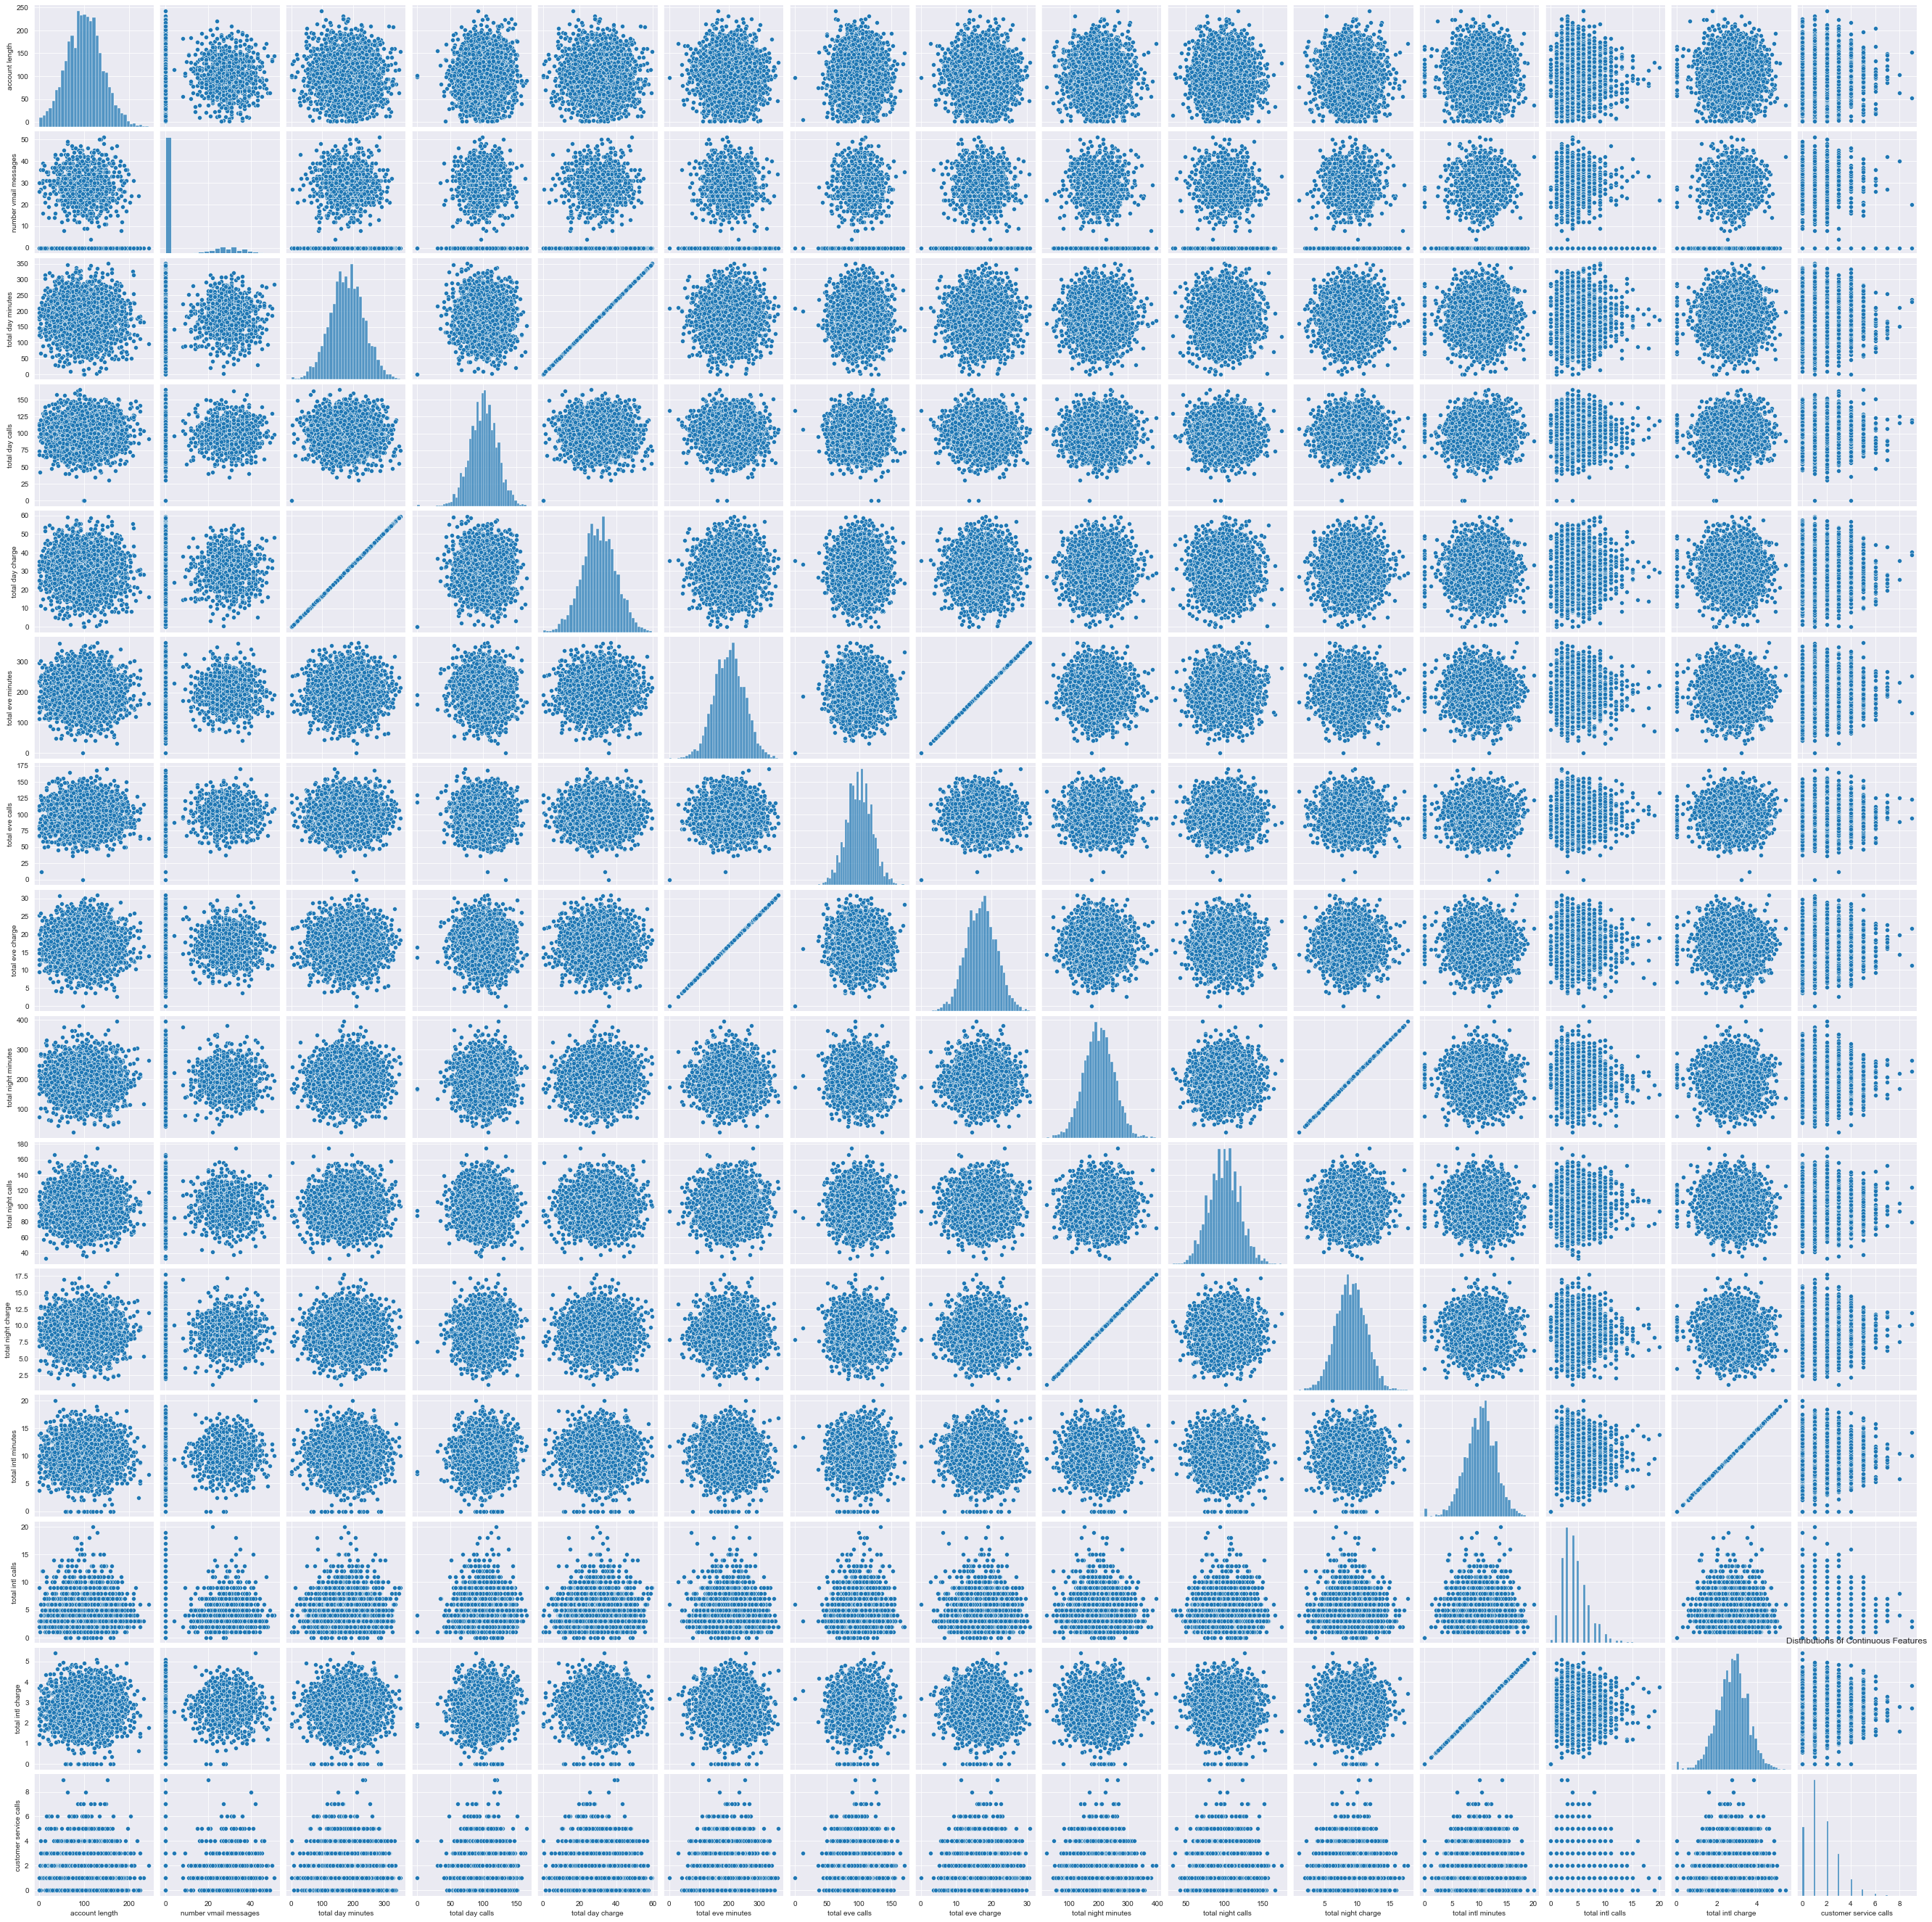

In [261]:
# Check for major outliers
cont_df = df.drop(columns=['state', 'international plan', 'voice mail plan', 'churn', 'area code'])

sns.pairplot(cont_df)
plt.title('Distributions of Continuous Features')
plt.show()

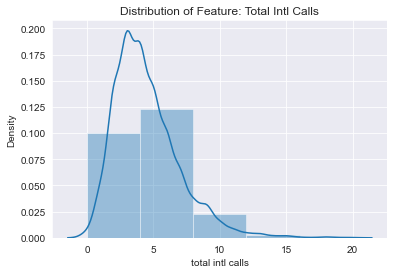

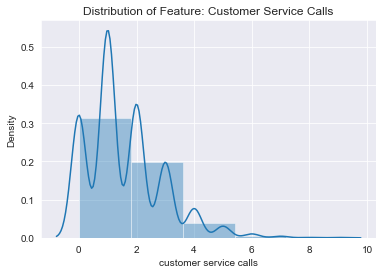

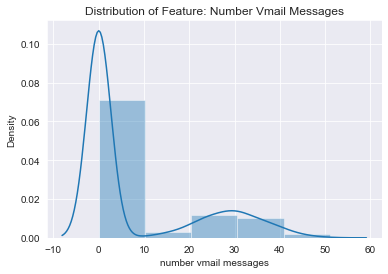

In [207]:
# A closer look at 3 strange distributions
for col in ['total intl calls', 'customer service calls', 'number vmail messages']:
    sns.distplot(df[col], bins=5)
    plt.title(f'Distribution of Feature: {col.title()}')
    plt.show()

This dataset is already clean since there were no null values, no duplicates, and minimal outliers. Most of the dataset is normally distributed with no major outliers.

The only 3 continuous features with strange distributions are the 3 above. However, their outliers do not seem to be large enough to deal with right now hence I may feature engineer something to deal with them later since they have information that could be useful to predict customer churn. I also intend to deal with the imbalance of the target column during the Modelling phase.

## Exploratory Data Analysis
This process is dedicated to exploring and understanding the dataset. The goal is to uncover patterns, identify relationships between variables, detect outliers, and gather insights about the data before applying any modeling or statistical techniques. It is crucial to ensure that the subsequent analysis is based on a solid foundation.

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

### Univariate Analysis
In this section, we will examine each column in the dataset to understand the distributions, central tendencies, and spread of the features. We will also identify any outliers or patterns that may be present.

#### Distribution of the Churn Feature

In [263]:
# Plotting the target variable distribution
class_counts = df.groupby("churn").size()

# Create a bar chart of the value counts using Plotly
fig = go.Figure(
    data=[go.Bar(x=class_counts.index, y=class_counts.values)],
    layout=go.Layout(title="Churn Distribution", xaxis=dict(tickvals=[0, 1], ticktext=["Not Churn", "Churn"]), 
          hovermode = 'closest',width=600)
)

# Show the chart
fig.show()

Out of the 3,333 customers included in the dataset, 483 have ended their contracts, representing approximately 14.5% of the total customer base. This disparity in the distribution of the binary classes indicates an imbalance in the data. Addressing this issue is crucial before proceeding with modeling, as an imbalanced feature can lead to inaccurate predictions by the model.

#### Distribution of the area code feature

In [264]:
# Pie chart of area code feature
area = df['area code'].value_counts()
transanction = area.index
quantity = area.values

# plot pie circle with plotly
figure = px.pie(df,
               values = quantity,
               names = transanction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

Almost half of the customers are in area code 415, a quarter of customers are in area code 510 and another quarter are in area code 408.

#### Distributions of numerical features

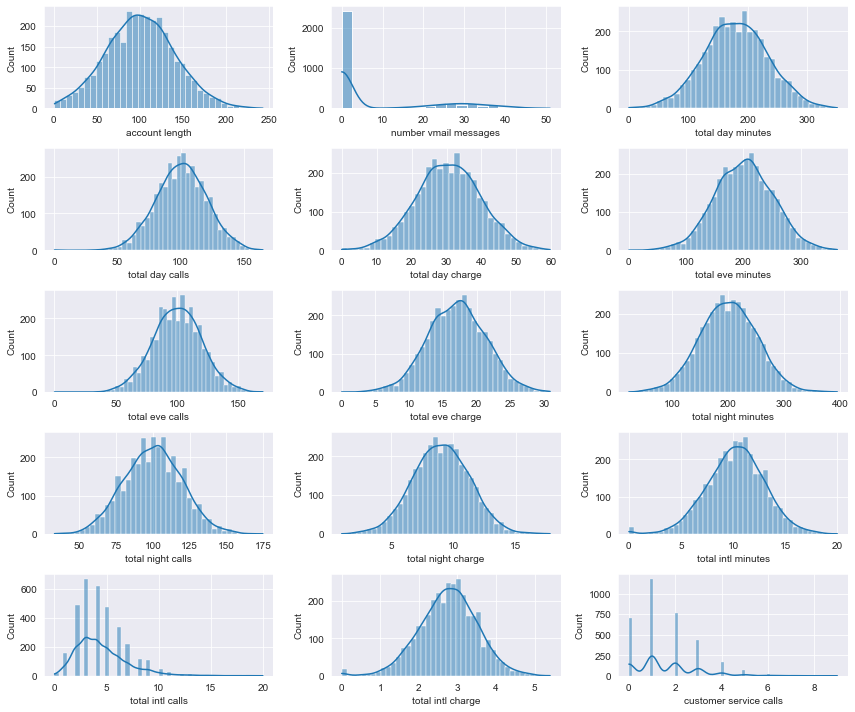

In [265]:
#checking for distribution of the numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()

All features, with the exception of customer service calls and the number of voicemail messages, exhibit a normal distribution. Although total international calls appear slightly skewed to the right, it still follows a roughly normal distribution. However, the distribution of customer service calls displays several peaks, suggesting the presence of multiple modes within the population.

#### Distribution of categorical features

In [266]:
# Checking the distribution of categorical features
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, data=df,color='lightblue', order=df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

##### State Feature

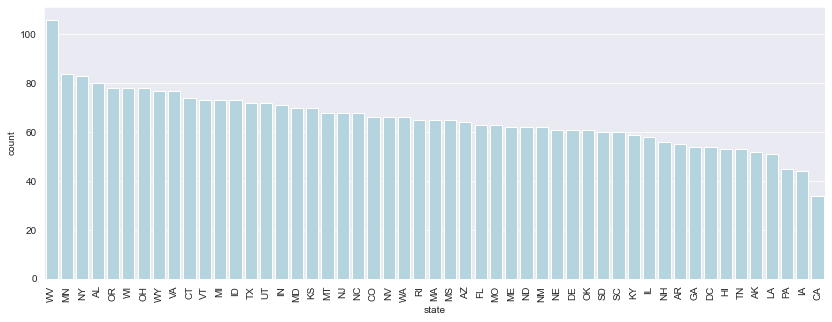

In [267]:
plot_categorical_distribution(df, 'state')

Most of the customers are from West Virginia, Minnesota, NewYork, Alabama and Wisconsin.

##### Voicemail Plan Feature

In [268]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

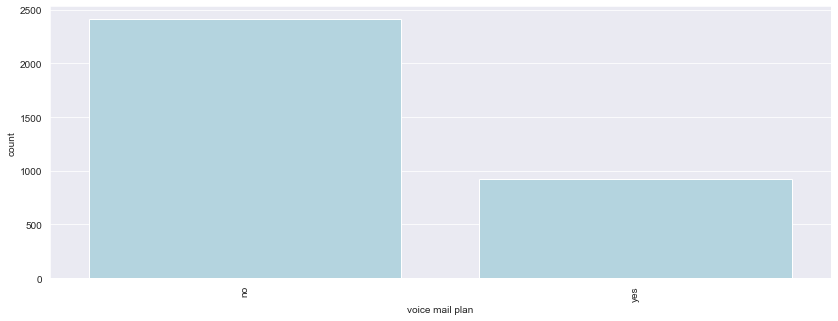

In [269]:
plot_categorical_distribution(df, 'voice mail plan')

Only 922 customers out of 3333 have a voicemail plan which is about 0.3%.

##### International Plan Feature

In [270]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

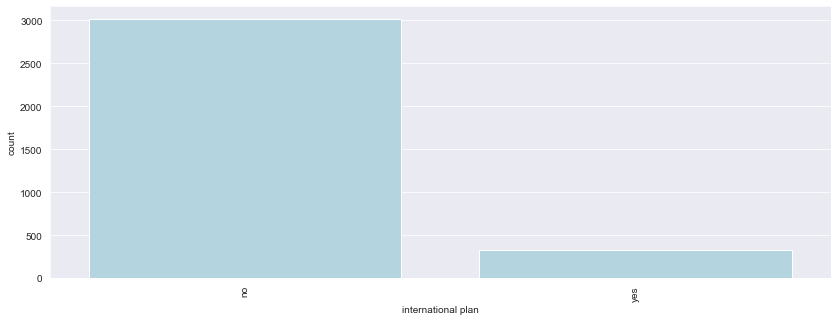

In [271]:
plot_categorical_distribution(df,'international plan')

Only 323 customers out of 3333 have an international plan which is about 0.1%.

### Bivariate Analysis
In this section, we delve into exploring the relationship or association between pairs of variables in the dataset which enables us to observe how variations in one variable correspond to variations in another variable.

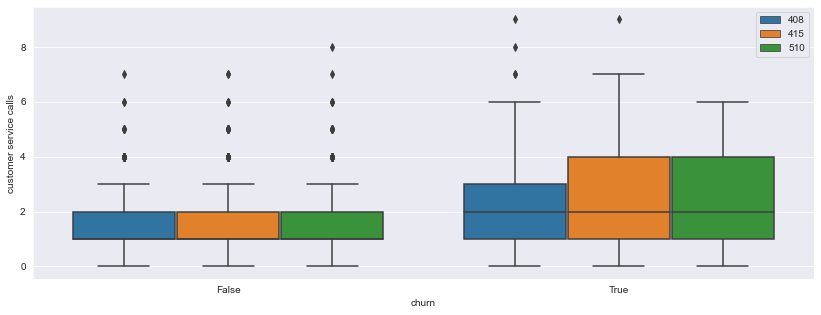

In [272]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

The majority of customers who terminated their accounts belong to area codes 415 and 510. Additionally, it is evident that there are several outliers present in the dataset.

In [273]:
# Checking the distribution of categorical features based on churn rate
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(10, 4))
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)
    top_10_categories = churn_counts.head(10).index.tolist()
    sns.countplot(x=feature, hue="churn", data=df, order=top_10_categories)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

#### State Feature

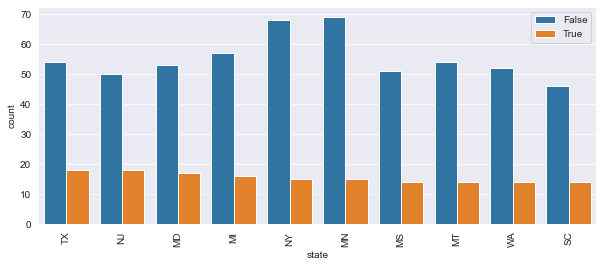

In [274]:
plot_categorical_distribution(df, 'state')

Of all the customers that churned, majority are from Texas, New Jersey, Maryland, Miami and NewYork.

#### Voicemail Plan Feature

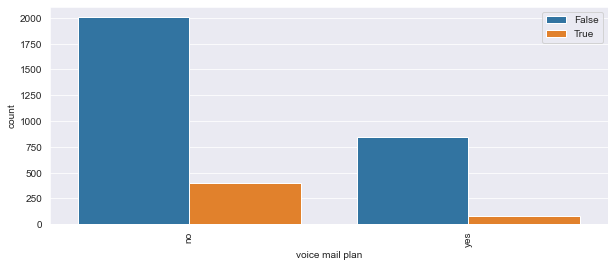

In [275]:
plot_categorical_distribution(df, 'voice mail plan')

Many customers who churned did not have an voicemail plan.

#### International Plan Feature

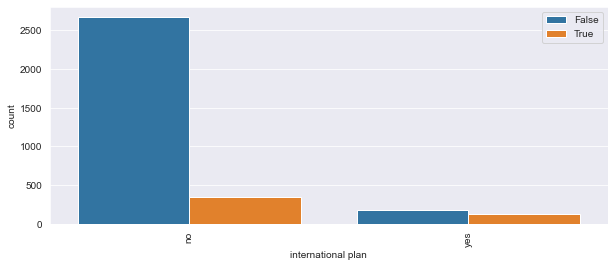

In [276]:
plot_categorical_distribution(df, 'international plan')

Many customers who churned did not have an international plan.

#### Distributions of the Churn Feature Charges

In [277]:
def plot_churn_kde(df, x_column, charge_type):
    """
    A function to plot features based on churn rate
    """
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

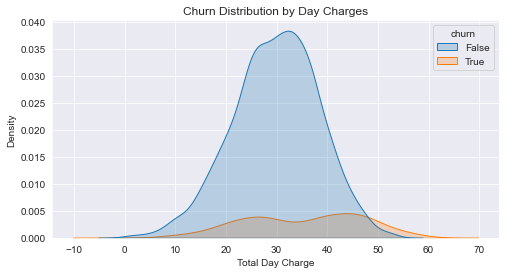

In [278]:
# Churn by day charges
plot_churn_kde(df, 'total day charge', 'Day')

The KDE plot indicates that customers who have churned tend to have higher total day charges compared to those who have not churned. This observation suggests that dissatisfaction or perceived high expenses during the day may contribute to a higher likelihood of churn among customers.

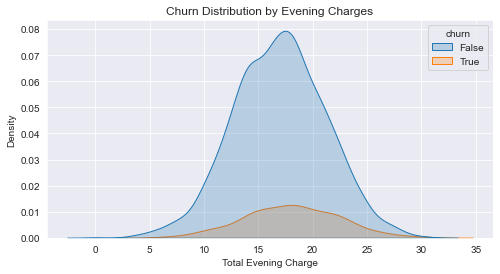

In [279]:
# Churn by evening charges
plot_churn_kde(df, 'total eve charge', 'Evening')

Similar to the churn by day charges plot, the KDE plot for churn by evening charges also demonstrates a comparable trend. Customers who have churned exhibit higher total evening charges compared to those who have not churned.

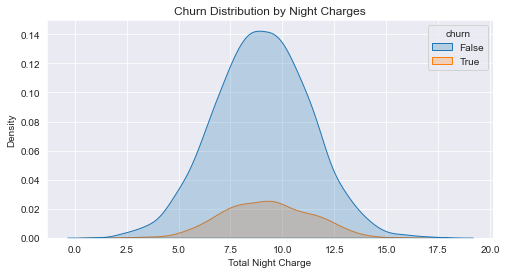

In [280]:
# Churn by night charges
plot_churn_kde(df, 'total night charge', 'Night')

The KDE plot for churn by night charges follows a pattern similar to that observed in the churn by day charges and churn by evening charges plots. Customers who have churned typically exhibit higher total night charges compared to those who have not terminated their accounts.

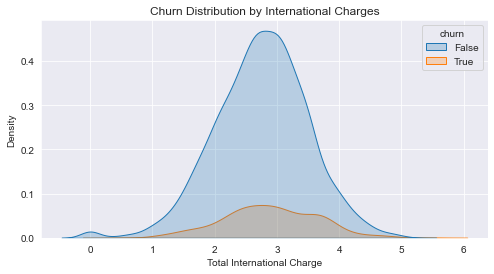

In [281]:
plot_churn_kde(df, 'total intl charge', 'International')

The plot implies that customers with higher total international charges exhibit a slightly higher probability of churning.

### Handling Outliers
Outliers have the potential to significantly affect the performance of predictive models, as they can introduce noise or bias the training process. Therefore, we exclude them to enhance the ability of our models to generalize patterns and generate more precise predictions on unseen data.

In [282]:
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print(df.shape)

(3169, 20)


### Correlation Heatmap of the features

In [283]:
# Finding correlation between features using a heatmap
def corrmatrix(df):
    ''' This function plots a correlation matrix for a given dataframe '''
    plt.figure(figsize=(14,14))

    corr = df.corr()

    # Generate a mask to only show the bottom triangle
    corr_tri = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))

    sns.heatmap(data = corr_tri, center = 0, cmap = "YlGnBu", annot = True, fmt='.1g',vmin=-1);
    plt.title('Correlation of Features')
    plt.show()

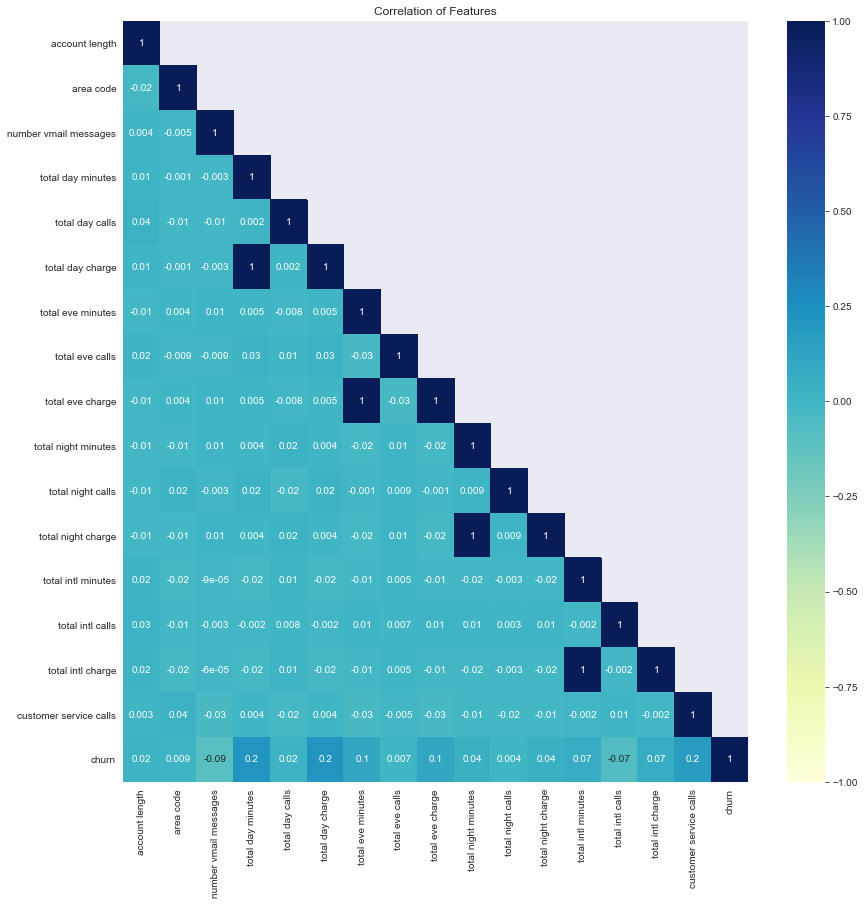

In [129]:
corrmatrix(df)

The majority of features do not exhibit strong correlations, but some display perfect correlations:
* Total day charge and total day minutes features are fully positively correlated.
* Total eve charge and total eve minutes features are fully positively correlated.
* Total night charge and total night minutes features are fully positively correlated.
* Total int charge and total int minutes features are fully positively correlated.

This perfect correlation is justifiable because the charge is directly influenced by the minutes used.

### Checking for multicollinearity of features

In [284]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

# Drop the features
df = df.drop(to_drop, axis=1) 

## Data Pre-processing
This is the process where raw data is transformed into a clean, structured format suitable for analysis and modeling. 

### Feature Engineering
Here, raw data is transformed into features that more effectively represent the underlying problem to predictive models. This process aims to enhance model accuracy on unseen data. Techniques such as Label Encoding, One-Hot Encoding, and Scaling are commonly applied to prepare the data for modeling.

#### Label Encoding

In [285]:
# Convert columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

In [286]:
categorical_features = ['area code']  
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

#### One-Hot Encoding

In [287]:
df = pd.get_dummies(df,columns = ['state', 'area code','international plan','voice mail plan'])
df.head()

account length  number vmail messages  total day calls  total day charge  \
0             128                     25              110             45.07   
1             107                     26              123             27.47   
2             137                      0              114             41.38   
3              84                      0               71             50.90   
4              75                      0              113             28.34   

   total eve calls  total eve charge  total night calls  total night charge  \
0               99             16.78                 91               11.01   
1              103             16.62                103               11.45   
2              110             10.30                104                7.32   
3               88              5.26                 89                8.86   
4              122             12.61                121                8.41   

   total intl calls  total intl charge  ...  state_WI  state_WV  state_WY  \
0                 3               2.70  ...         0         0         0   
1                 3               3.70  ...         0         0         0   
2                 5               3.29  ...         0         0         0   
3                 7               1.78  ...         0         0         0   
4                 3               2.73  ...         0         0         0   

   area code_0  area code_1  area code_2  international plan_no  \
0            0            1            0                      1   
1            0            1            0                      1   
2            0            1            0                      1   
3            1            0            0                      0   
4            0            1            0                      0   

   international plan_yes  voice mail plan_no  voice mail plan_yes  
0                       0                   0                    1  
1                       0                   0                    1  
2                       0                   1                    0  
3                       1                   1                    0  
4                       1                   1                    0  

[5 rows x 70 columns]

### Scaling the dataframe

In [288]:
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

account length  number vmail messages  total day calls  total day charge  \
0        0.587963               0.510204         0.576271          0.773956   
1        0.490741               0.530612         0.686441          0.450248   
2        0.629630               0.000000         0.610169          0.706088   
3        0.384259               0.000000         0.245763          0.881184   
4        0.342593               0.000000         0.601695          0.466250   

   total eve calls  total eve charge  total night calls  total night charge  \
0         0.487179          0.490082           0.422414            0.643644   
1         0.521368          0.483858           0.525862            0.675974   
2         0.581197          0.238040           0.534483            0.372520   
3         0.393162          0.042007           0.405172            0.485672   
4         0.683761          0.327888           0.681034            0.452608   

   total intl calls  total intl charge  ...  state_WI  state_WV  state_WY  \
0               0.2           0.487585  ...       0.0       0.0       0.0   
1               0.2           0.713318  ...       0.0       0.0       0.0   
2               0.4           0.620767  ...       0.0       0.0       0.0   
3               0.6           0.279910  ...       0.0       0.0       0.0   
4               0.2           0.494357  ...       0.0       0.0       0.0   

   area code_0  area code_1  area code_2  international plan_no  \
0          0.0          1.0          0.0                    1.0   
1          0.0          1.0          0.0                    1.0   
2          0.0          1.0          0.0                    1.0   
3          1.0          0.0          0.0                    0.0   
4          0.0          1.0          0.0                    0.0   

   international plan_yes  voice mail plan_no  voice mail plan_yes  
0                     0.0                 0.0                  1.0  
1                     0.0                 0.0                  1.0  
2                     0.0                 1.0                  0.0  
3                     1.0                 1.0                  0.0  
4                     1.0                 1.0                  0.0  

[5 rows x 70 columns]

## Modeling
Our goal in this section is to develop a predictive model capable of accurately identifying customer churn based on the features available in our dataset. Our primary evaluation metric will be the recall score, with a target of achieving 80% or higher to meet project requirements.

To achieve our objectives, we will employ the following algorithms:
* Logistic Regression
* Decision Tree
* Random Forest
* XG Boost

Additionally, we will evaluate the performance of our models using the ROC_AUC metric.

Given the class imbalance in our dataset, we will address this issue by utilizing SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class, thereby balancing the dataset and improving the model's ability to capture patterns associated with churn.

In [289]:
#Defining X and y
X = df.drop("churn", axis=1)
y = df["churn"]

### Train Test Split
We shall use a test_size of 0.25 while splitting

In [290]:
# splitting the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

### Applying the SMOTE technique
This is needed in order to resolve the unbalanced churn feature thus helping overcome the overfitting problem.

In [291]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

### Logistic Regression
This is a statistical method used for binary classification tasks, where the target variable has two possible outcomes. It estimates the probability of an instance belonging to a specific class based on the values of independent variables. It is a fundamental technique in machine learning and statistics, often used for predicting outcomes in various fields.

In [292]:
# Instantiate the logistic regression
logreg = LogisticRegression(random_state=123)

# Fit the model on the training data 
logreg.fit(resampled_X_train, resampled_y_train)

# Predict on the labels of test set
y_pred_log = logreg.predict(X_test)

In [293]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

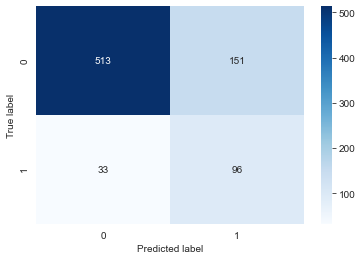

In [294]:
plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [295]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85       664
         1.0       0.39      0.74      0.51       129

    accuracy                           0.77       793
   macro avg       0.66      0.76      0.68       793
weighted avg       0.85      0.77      0.79       793



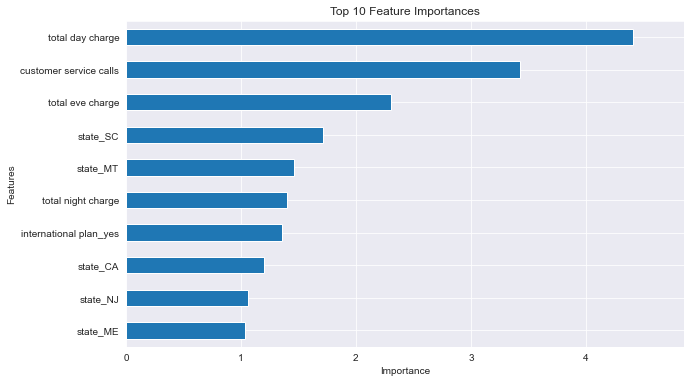

In [296]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

The logistic regression model achieved a good recall score of 0.74, signifying its effectiveness as a baseline model. This indicates that it accurately identifies approximately 74% of the positive instances.

Furthermore, an analysis of the confusion matrix revealed a higher count of true positives and true negatives compared to false positives and false negatives. This suggests that the model consistently makes accurate predictions and does not suffer from overfitting.

In terms of feature importance, the model identifies total day charge, customer service calls, and total eve charge as the three most influential factors.

### Decision Tree Classifier
Decision trees are a type of supervised machine learning algorithm utilized for data classification. They operate by recursively partitioning the data into smaller subsets until each subset consists exclusively of data belonging to a single class. When presented with a new data point, a decision tree predicts its class by traversing the tree along the path that aligns with the values of its features.

In [297]:
# Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=123)

# Fit model on the training data
dt_clf.fit(resampled_X_train,resampled_y_train)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)

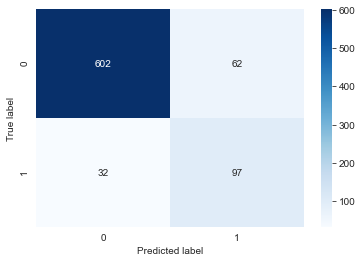

In [298]:
plot_confusion_matrix(y_test, y_pred_dt, [0,1])

In [299]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       664
         1.0       0.61      0.75      0.67       129

    accuracy                           0.88       793
   macro avg       0.78      0.83      0.80       793
weighted avg       0.89      0.88      0.89       793



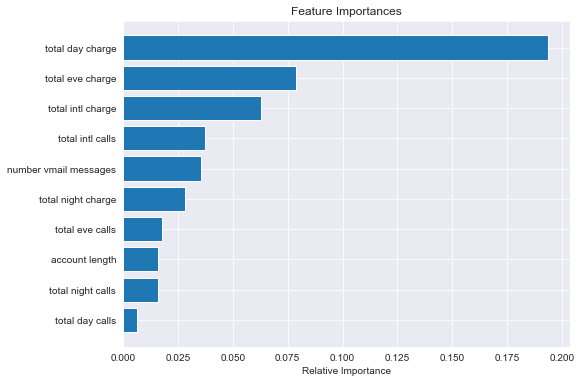

In [300]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The decision tree model achieves a recall score of 0.75, which, while respectable, falls slightly short of surpassing our baseline model. This signifies that the model accurately identifies approximately 75% of the true positive instances.

Analysis of the confusion matrix reveals a notable prevalence of true positives and true negatives over false positives and false negatives. This suggests that the model predominantly makes accurate predictions and does not suffer from overfitting.

Furthermore, the model identifies total day charge, total eve charge, and total intl charge as the top three most influential features in predicting outcomes.

### Random Forest Classifier
Random Forest is a versatile ensemble learning technique used for classification, regression, and other tasks. It operates by creating numerous decision trees during training and then combines their predictions to generate a final class prediction or regression value. This averaging of predictions from multiple trees helps improve overall accuracy and robustness compared to individual decision trees.

In [301]:
# Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=123)

# Fit model on the training data
rf_clf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=123)

# predict on the test data
y_pred_rf = rf_clf.predict(X_test)

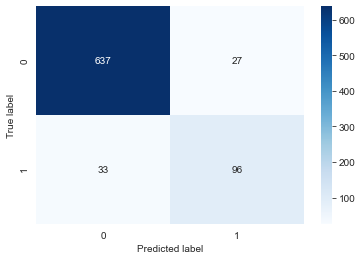

In [302]:
plot_confusion_matrix(y_test, y_pred_rf, [0,1])

In [303]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       664
         1.0       0.78      0.74      0.76       129

    accuracy                           0.92       793
   macro avg       0.87      0.85      0.86       793
weighted avg       0.92      0.92      0.92       793



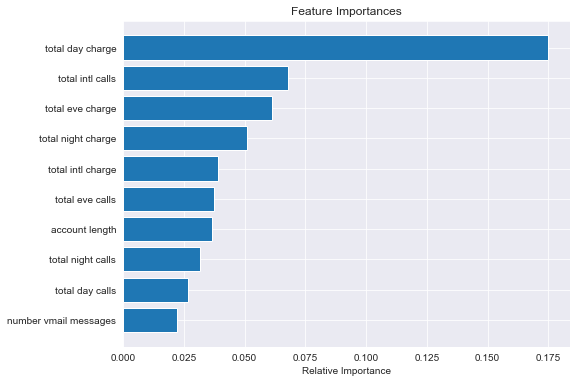

In [304]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest classifier model achieves a commendable recall score of 0.74, signifying a notable improvement over the previous model. This implies that the model adeptly identifies approximately 74% of the actual positive instances correctly.

Upon analyzing the confusion matrix, it becomes evident that the model exhibits a higher count of true positives and true negatives in comparison to false positives and false negatives. This observation suggests that the model consistently makes accurate predictions, indicating it is not overfitting the data.

As per the model's assessment, the top three most influential features are total day charge, total intl calls, and total eve calls.

### XGBoost
XGBoost(Extreme Gradient Boosting) stands out as a potent machine learning algorithm tailored for both regression and classification tasks. Leveraging gradient boosting and ensemble learning methodologies, XGBoost amalgamates numerous weak models, often decision trees, into a robust predictive model. This approach yields exceptional predictive accuracy and is widely employed across various domains for its effectiveness in handling complex datasets and producing reliable predictions.

In [305]:
from xgboost import XGBClassifier

# Instantiate XGBClassifier
xg_clf = XGBClassifier(random_state=123)

#Fit model on the training data
xg_clf.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

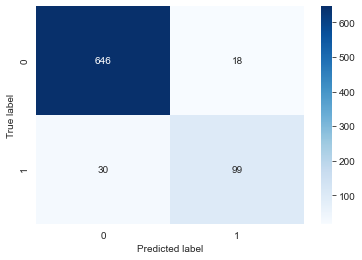

In [306]:
#predict on the test data
y_pred_xg = xg_clf.predict(X_test)

plot_confusion_matrix(y_test, y_pred_xg, [0,1])

In [307]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       664
         1.0       0.85      0.77      0.80       129

    accuracy                           0.94       793
   macro avg       0.90      0.87      0.88       793
weighted avg       0.94      0.94      0.94       793



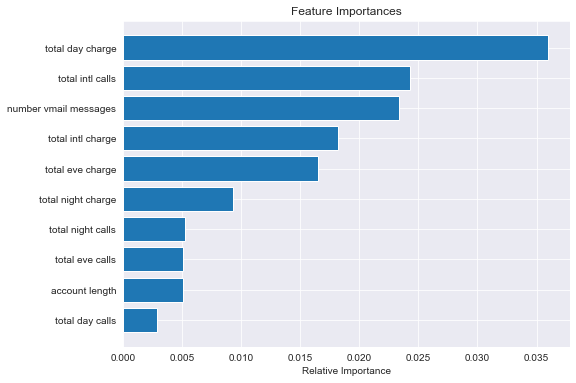

In [308]:
feature_names = list(resampled_X_train.columns)
importances = xg_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The XGBoost classifier model showcases a remarkable recall score of 0.77, surpassing the performance of all prior models. This implies that the model adeptly identifies approximately 77% of the actual positive instances.

Upon evaluating the confusion matrix, it becomes evident that the model exhibits a greater number of true positives and true negatives compared to false positives and false negatives. This suggests that the model consistently makes accurate predictions and avoids overfitting.

As per the model's analysis, the top three most significant features are total day charge, total intl calls, and number vmail messages.

## Model Evaluation
Our primary evaluation metrics will be the recall score and ROC_AUC. We shall assess multiple models using these metrics and select the top two performers for further tuning to enhance their performance.

### Recall Score
The recall score, also known as sensitivity or true positive rate, measures the proportion of actual positive instances that the model correctly identifies as positive. A higher recall score indicates that the model is better at capturing positive instances and has fewer false negatives.

In [309]:
np.random.seed(123)

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table

recall
classifiers                     
LogisticRegression      0.744186
RandomForestClassifier  0.744186
DecisionTreeClassifier  0.728682
XGBClassifier           0.767442

The XGBoostClassifier achieved the highest recall score, followed by the RandomForestClassifier and LogisticRegression. The DecisionTreeClassifier, on the other hand, attained the lowest recall score of 0.73.

### ROC_AUC Curve
The ROC AUC score provides a measure of how well a model can distinguish between positive and negative classes across all possible threshold settings, with higher values indicating better performance.

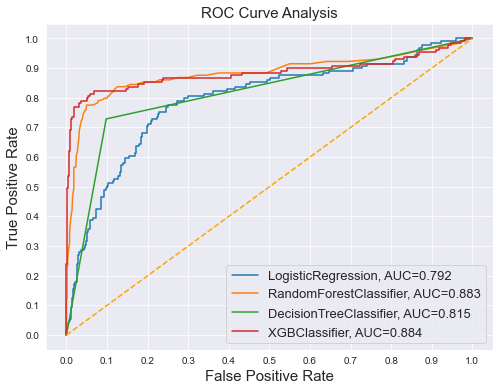

In [312]:
np.random.seed(123)
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

The analysis of the ROC curves reveals that the XGBClassifier exhibits the most favorable performance, followed by the RandomForestClassifier, DecisionTreeClassifier, and LogisticRegression respectively. Specifically, the XGBClassifier achieves the highest AUC score of 0.884, while the LogisticRegression attains the lowest AUC score of 0.79.

TPR denotes the proportion of positive instances correctly classified, while FPR represents the proportion of negative instances incorrectly classified. The AUC serves as a comprehensive metric for assessing the classifier's overall performance.

A higher AUC score indicates that the classifier excels in distinguishing between positive and negative instances.

### Model Tuning
After assessing the models using recall scores and ROC AUC, it's evident that both the XGBoost classifier and the RandomForest classifier have demonstrated promising performance. To enhance their effectiveness further, we can conduct model tuning using GridSearch, RandomizedSearch, and Bayesian Optimization.

#### GridSearchCV

In [314]:
# Define the hyperparameter grid
param_grid = {
    "max_depth": [8,15,20],
    "n_estimators":[500,1000],
    "min_samples_split":[5,10,15],
    "criterion":['entropy','gini']
    }
# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state = 123)
# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=False)

# Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train,resampled_y_train)

# print the best parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}


In [315]:
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 20,
                                  min_samples_split = 5,
                                  n_estimators = 1000,
                                  random_state=123)
# Fit the model on the training data
rf_tuned.fit(resampled_X_train, resampled_y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=1000, random_state=123)

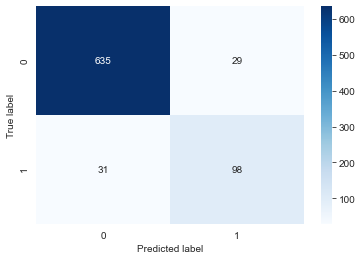

In [316]:
# Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)

# The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [317]:
# Print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       664
         1.0       0.77      0.76      0.77       129

    accuracy                           0.92       793
   macro avg       0.86      0.86      0.86       793
weighted avg       0.92      0.92      0.92       793



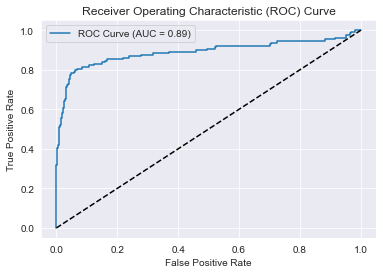

In [318]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The ROC curve and recall metric indicate that the tuned Random Forest model excels in distinguishing between positive and negative classes (churned and non-churned customers) and effectively identifying churned customers. With a recall score of 0.76, the model accurately captures 76% of the actual churned customers.

In [319]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [1,2,5,10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100,200],
}

# Create an instance of XGBoost Classifier
xgb = XGBClassifier(random_state = 123)

# Create GridSearchCV object 
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring = 'recall',n_jobs=1)

# Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train,resampled_y_train)

# print the best parameters
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}


#### RandomizedSearchCV
It randomly selects combinations from a predefined search space, making it more efficient for large hyperparameter spaces.

In [325]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 6),
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 500, 1000]
}

# Create an instance of XGBoost Classifier
xgb = XGBClassifier(random_state=123)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, 
    n_iter=100, scoring='recall', cv=3, 
    verbose=2, random_state=123, n_jobs=-1
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print(random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}


#### Bayesian Optimization
This technique iteratively builds a probabilistic model of the objective function (in this case, model performance) and uses it to intelligently select the next set of hyperparameters to evaluate.

In [329]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

# Define the function to optimize
def xgb_cv(max_depth, min_child_weight, subsample, colsample_bytree, gamma, learning_rate, n_estimators):
    xgb = XGBClassifier(max_depth=int(max_depth),
                        min_child_weight=int(min_child_weight),
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        gamma=gamma,
                        learning_rate=learning_rate,
                        n_estimators=int(n_estimators),
                        random_state=123)
    scores = cross_val_score(xgb, resampled_X_train, resampled_y_train, cv=3, scoring='recall')
    return scores.mean()

# Define the search space
pbounds = {'max_depth': (3, 10),
           'min_child_weight': (1, 6),
           'subsample': (0.5, 1.0),
           'colsample_bytree': (0.5, 1.0),
           'gamma': (0, 0.5),
           'learning_rate': (0.01, 0.3),
           'n_estimators': (100, 1000)}

# Perform Bayesian Optimization
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=pbounds,
    random_state=123,
    verbose=2
)

optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.9438    | 0.8482    | 0.1431    | 0.07579   | 6.859     | 4.597     | 480.8     | 0.9904    |
| 2         | 0.9414    | 0.8424    | 0.2405    | 0.1237    | 5.402     | 4.645     | 494.7     | 0.5298    |
| 3         | 0.9365    | 0.699     | 0.369     | 0.06292   | 4.228     | 3.658     | 578.6     | 0.8172    |
| 4         | 0.9457    | 0.9247    | 0.3622    | 0.1872    | 8.057     | 2.615     | 425.6     | 0.6141    |
| 5         | 0.9467    | 0.6469    | 0.3155    | 0.03671   | 6.036     | 3.154     | 544.3     | 0.7129    |
| 6         | 0.9472    | 0.6561    | 0.2132    | 0.2691    | 9.609     | 3.509     | 661.6     | 0.5578    |
| 7         | 0.9365    | 0.6586    | 0.2074    | 0.2612    | 4.753     | 3.415     | 987.0     | 0.7597    |
| 8       

| 45        | 0.9297    | 0.768     | 0.2195    | 0.1022    | 3.535     | 4.717     | 619.8     | 0.8112    |
| 46        | 0.9448    | 1.0       | 0.5       | 0.01      | 10.0      | 1.0       | 405.9     | 0.5       |
| 47        | 0.9491    | 0.7391    | 0.134     | 0.06278   | 9.89      | 1.198     | 420.8     | 0.5967    |
| 48        | 0.9506    | 1.0       | 0.009763  | 0.2432    | 10.0      | 1.0       | 432.5     | 0.5       |
| 49        | 0.9414    | 0.6817    | 0.03156   | 0.03383   | 8.707     | 5.995     | 435.9     | 0.5319    |
| 50        | 0.9414    | 0.8534    | 0.2387    | 0.2105    | 4.885     | 1.166     | 434.4     | 0.6747    |
| 51        | 0.952     | 0.7755    | 0.08709   | 0.279     | 9.21      | 1.607     | 286.3     | 0.9286    |
| 52        | 0.9399    | 0.6107    | 0.01587   | 0.2416    | 4.304     | 1.545     | 287.5     | 0.8779    |
| 53        | 0.9452    | 0.8256    | 0.4362    | 0.023     | 7.468     | 5.871     | 284.9     | 0.8891    |
| 54      

It appears that the optimization process is converging towards higher recall scores, indicating better performance. As the iterations progress, the recall score tends to increase, suggesting that the model's ability to correctly identify positive cases improves.

However, it's essential to note that while Bayesian Optimization is effective in searching for optimal hyperparameters, it does not guarantee the global optimum. Therefore, it's advisable to run multiple optimization trials and select the hyperparameters that consistently yield good performance across different runs. Additionally, it's crucial to consider the computational resources and time constraints when deciding the number of iterations for optimization.

In [320]:
# Create an instance of XGBoost Classifier with best params
xgb_tuned = XGBClassifier(learning_rate = 0.1,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 100,
                          subsample = 0.5,
                          random_state = 123)

# Fit on the training data
xgb_tuned.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

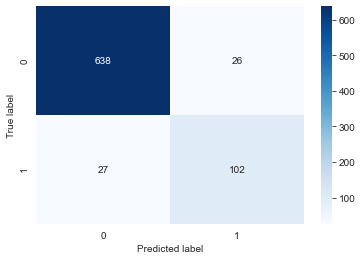

In [321]:
# Predict on the test data
y_pred_xgt = xgb_tuned.predict(X_test)

# Confusion matrix
plot_confusion_matrix(y_test, y_pred_xgt, [0,1])

In [322]:
# Classification report
print(classification_report(y_test, y_pred_xgt))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       664
         1.0       0.80      0.79      0.79       129

    accuracy                           0.93       793
   macro avg       0.88      0.88      0.88       793
weighted avg       0.93      0.93      0.93       793



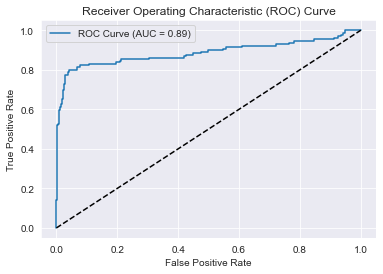

In [323]:
# Get the predicted probabilities for the positive class
y_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for XGB classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The analysis of the ROC curve and the recall metric reveals that the tuned XGBoost model outperforms RandomForest slightly in differentiating between positive and negative classes (churned and non-churned customers) and accurately identifying churned customers. With a recall score of 0.79, the model successfully captures 79% of the actual churned customers. This result is close to our target recall score of 0.8, demonstrating the effectiveness of the model in identifying churned customers.

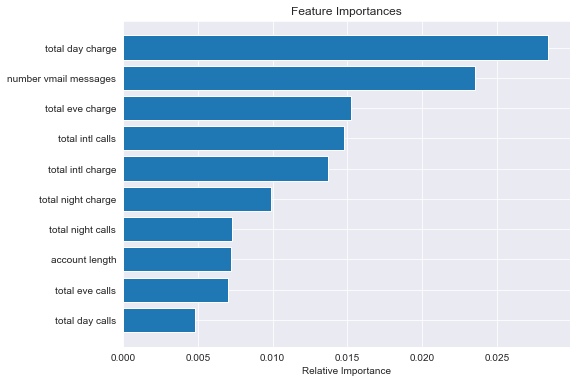

In [324]:
feature_names = list(resampled_X_train.columns)
importances = xgb_tuned.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Here, total day charge, number vmail messages, and total eve charges are the top three most important features.

### Ensemble Methods
They combine predictions from multiple models to produce a final prediction. 

#### Stacking
Stacking involves training multiple base models, using their predictions as input features for a meta-model, and then training the meta-model on these predictions.

In [332]:
from sklearn.ensemble import StackingClassifier

# Best parameters for RandomForestClassifier
rf_best_params = {
    'criterion': 'entropy',
    'max_depth': 20,
    'min_samples_split': 5,
    'n_estimators': 1000,
    'random_state': 123
}

# Best parameters for XGBClassifier
xgb_best_params = {
    'learning_rate': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'n_estimators': 100,
    'subsample': 0.5,
    'random_state': 123
}

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(**rf_best_params)),
    ('xgb', XGBClassifier(**xgb_best_params))
]

# Define the meta-model (classifier)
meta_model = LogisticRegression()

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the StackingClassifier on the training data
stacking_clf.fit(resampled_X_train, resampled_y_train)

# Predict on the test data
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred_stacking))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       664
         1.0       0.79      0.79      0.79       129

    accuracy                           0.93       793
   macro avg       0.88      0.88      0.88       793
weighted avg       0.93      0.93      0.93       793



The stacking classifier demonstrates strong performance, with high precision, recall, and F1-score for both classes. This indicates that the model effectively distinguishes between churned and non-churned customers and makes accurate predictions. The high accuracy further confirms the overall effectiveness of the model.

#### Blending
It is similar to stacking but typically involves using a holdout set for validation during meta-model training.

In [333]:
# Split the training data into two parts
X_train_blend, X_val_blend, y_train_blend, y_val_blend = train_test_split(
    resampled_X_train, resampled_y_train, test_size=0.2, random_state=123
)

# Train base models on the first part of the training data
rf_blend = RandomForestClassifier(**rf_best_params)
xgb_blend = XGBClassifier(**xgb_best_params)

rf_blend.fit(X_train_blend, y_train_blend)
xgb_blend.fit(X_train_blend, y_train_blend)

# Generate predictions on the second part of the training data
rf_blend_pred = rf_blend.predict(X_val_blend)
xgb_blend_pred = xgb_blend.predict(X_val_blend)

# Create a new feature matrix using the predictions
blend_features = np.column_stack((rf_blend_pred, xgb_blend_pred))

# Train a meta-model (e.g., logistic regression) on the blended features
blend_meta_model = LogisticRegression()
blend_meta_model.fit(blend_features, y_val_blend)

# Generate predictions on the test set
rf_test_pred = rf_blend.predict(X_test)
xgb_test_pred = xgb_blend.predict(X_test)
blend_test_features = np.column_stack((rf_test_pred, xgb_test_pred))
blend_pred = blend_meta_model.predict(blend_test_features)

# Evaluate performance
print(classification_report(y_test, blend_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       664
         1.0       0.79      0.76      0.77       129

    accuracy                           0.93       793
   macro avg       0.87      0.86      0.87       793
weighted avg       0.93      0.93      0.93       793



The results indicate that the blending approach achieves an accuracy of 93% on the test set, with high precision, recall, and F1-score for both classes. This suggests that blending effectively combines the predictions from multiple base models to make accurate predictions.

## Conclusion
It's commendable that despite achieving a respectable recall score of 79% with our XGB classifier, there's acknowledgment of the potential for further improvement through additional feature engineering. This recognition underscores a commitment to refining the predictive model and maximizing its effectiveness in identifying customers at risk of churn. Despite not achieving an ideal recall score, meeting the primary objective of predicting customer churn while maintaining an acceptable level of performance demonstrates the efficacy of the methodologies employed. With more time and continued iteration, there's optimism for even greater refinement and enhancement of the model, ultimately contributing to more proactive churn management strategies and sustained business success.

### Recommendations & Next Steps
Based on the project outcomes regarding SyriaTel customer churn, here are some recommendations and next steps for the company:

* Customer Segmentation: Further analyze customer segments to understand the specific characteristics and behaviors of customers more likely to churn. This understanding can guide targeted marketing strategies and personalized retention efforts.

* Tailored Retention Strategies: Develop tailored retention strategies based on the identified customer segments. These strategies could include personalized offers, loyalty programs, and proactive outreach to at-risk customers to address their concerns and incentivize them to stay.

* Enhanced Customer Experience: Continuously focus on enhancing the overall customer experience across all touchpoints, including customer service, billing processes, and service quality. Satisfied customers are less likely to churn, so investing in customer satisfaction can be a powerful retention strategy.

* Predictive Analytics Integration: Integrate predictive analytics models, such as the churn prediction model developed in this project, into SyriaTel's operational processes. By leveraging real-time data and predictive insights, the company can identify potential churners early and take proactive measures to retain them.

* Feedback Mechanisms: Implement feedback mechanisms to gather insights from churned customers about their reasons for leaving. Analyzing this feedback can uncover underlying issues or areas for improvement in SyriaTel's products or services, helping to reduce churn in the future.

* Continuous Monitoring and Evaluation: Continuously monitor and evaluate the effectiveness of retention strategies and predictive models. Regularly review key performance indicators such as churn rate, customer lifetime value, and customer satisfaction scores to assess the impact of implemented initiatives and adjust strategies as needed.

* Employee Training and Engagement: Invest in employee training and engagement programs to ensure that frontline staff are equipped to address customer concerns and deliver exceptional service. Empowered and motivated employees play a crucial role in retaining customers and fostering long-term relationships.

* Market Research and Competitor Analysis: Stay informed about market trends, competitor offerings, and evolving customer preferences through ongoing market research and competitor analysis. This insight can help SyriaTel stay ahead of the competition and adapt its strategies to meet changing customer needs.

By implementing these recommendations and next steps, SyriaTel can improve its customer retention efforts, reduce churn, and ultimately enhance its competitiveness and long-term sustainability in the telecommunications industry.